In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
df=pd.read_csv('laptop_data.csv')

In [123]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [47]:
df = df.drop(df.columns[0], axis=1)

In [124]:
df.columns.tolist()

['Unnamed: 0',
 'Company',
 'TypeName',
 'Inches',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight',
 'Price']

In [48]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [49]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [50]:
df['IPS'] = df['ScreenResolution'].str.contains('IPS').astype(int)

In [51]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1


In [52]:
df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d{3,4}x\d{3,4})')

# Step 2: Split into x_res (width) and y_res (height)
df[['x_res', 'y_res']] = df['Resolution'].str.split('x', expand=True).astype(int)

# Drop the temporary 'Resolution' column (optional)
df = df.drop('Resolution', axis=1)

In [53]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,2560,1600


In [54]:
df = df.drop('ScreenResolution', axis=1)

In [55]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,2560,1600


C:\Users\hp\AppData\Local\Temp\ipykernel_17104\1920279958.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Company'], y=df['Price'], estimator='mean', ci=None, palette='viridis')
C:\Users\hp\AppData\Local\Temp\ipykernel_17104\1920279958.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Company'], y=df['Price'], estimator='mean', ci=None, palette='viridis')


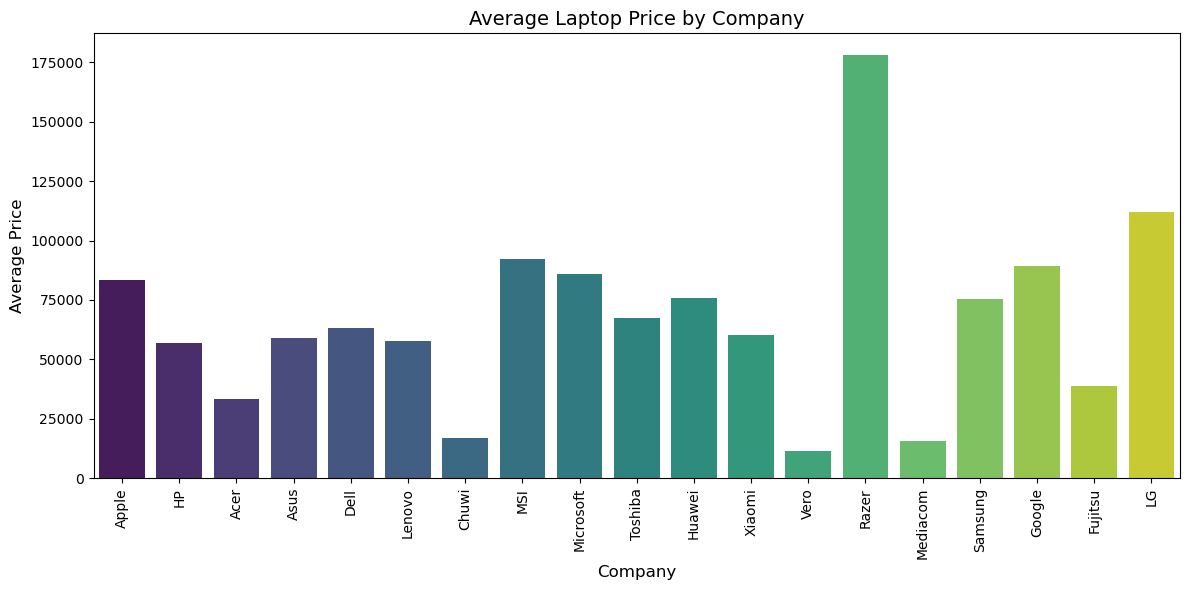

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x=df['Company'], y=df['Price'], estimator='mean', ci=None, palette='viridis')
plt.xticks(rotation='vertical')
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Average Laptop Price by Company', fontsize=14)
plt.tight_layout()
plt.show()

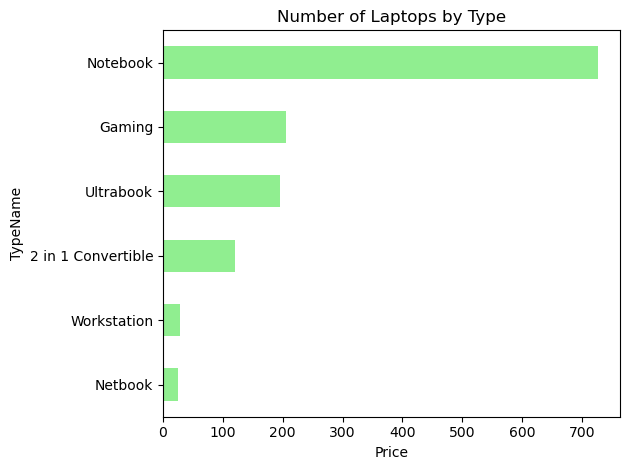

In [57]:
df['TypeName'].value_counts().sort_values().plot(
    kind='barh',  # Horizontal bars
    color='lightgreen',
    title='Number of Laptops by Type'
)
plt.xlabel('Price')
plt.tight_layout()
plt.show()

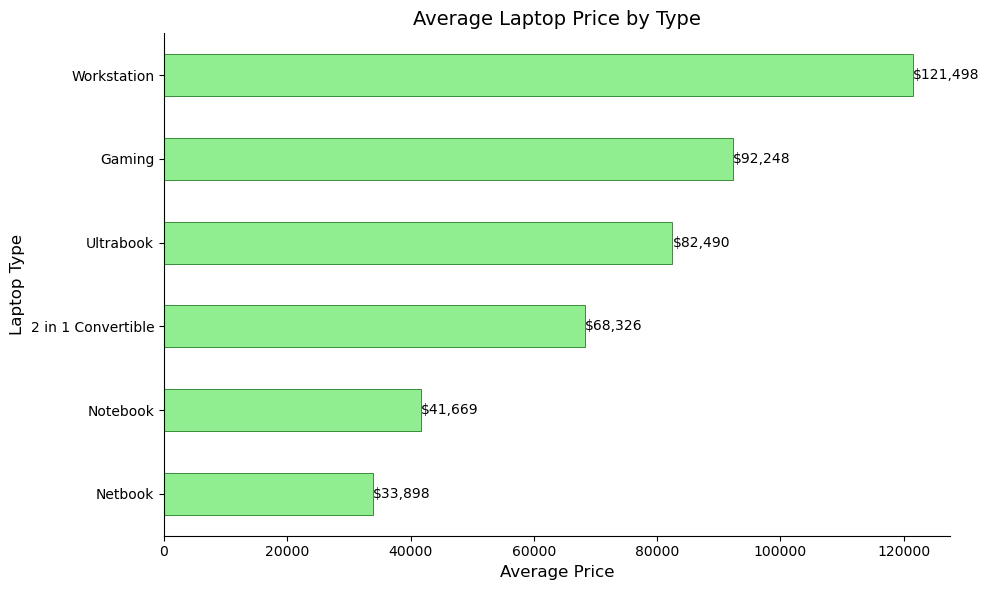

In [58]:
import matplotlib.pyplot as plt

# Calculate average price by laptop type and sort
avg_price_by_type = df.groupby('TypeName')['Price'].mean().sort_values()

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
avg_price_by_type.plot(
    kind='barh',  # Horizontal bars
    color='lightgreen',
    edgecolor='darkgreen',
    linewidth=0.5
)

# Add labels and title
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Laptop Type', fontsize=12)
plt.title('Average Laptop Price by Type', fontsize=14)

# Add value labels
for i, price in enumerate(avg_price_by_type):
    plt.text(price, i, f'${price:,.0f}', va='center', fontsize=10)

# Remove spines for cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

In [59]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,2560,1600


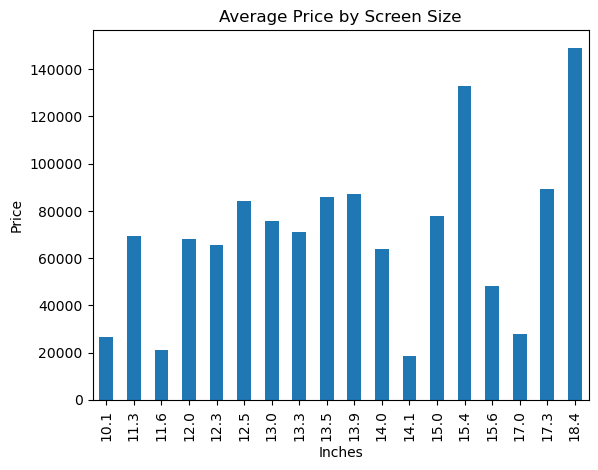

In [60]:
df.groupby('Inches')['Price'].mean().plot(kind='bar')

plt.title('Average Price by Screen Size')
plt.xlabel('Inches')
plt.ylabel('Price')
plt.show()

In [61]:
import re  # Import the regular expressions module

# Create a single combined CPU column
df['Cpu_Combined'] = df['Cpu'].str.extract(
    r'(Intel|AMD|Apple)\s*(Core\s)?(i[3-9]|Ryzen\s?\d|M[1-2]|A\d+|FX|Xeon|Pentium|Celeron|Atom|Snapdragon)?',
    flags=re.IGNORECASE
).apply(lambda x: ' '.join([part for part in x if pd.notna(part)]), axis=1)

# Clean up results
df['Cpu_Combined'] = df['Cpu_Combined'].str.replace('Core ', '').str.strip()
df['Cpu_Combined'] = df['Cpu_Combined'].fillna('Other')

In [62]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,x_res,y_res,Cpu_Combined
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,2560,1600,Intel i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,1440,900,Intel i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,1920,1080,Intel i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,2880,1800,Intel i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,2560,1600,Intel i5


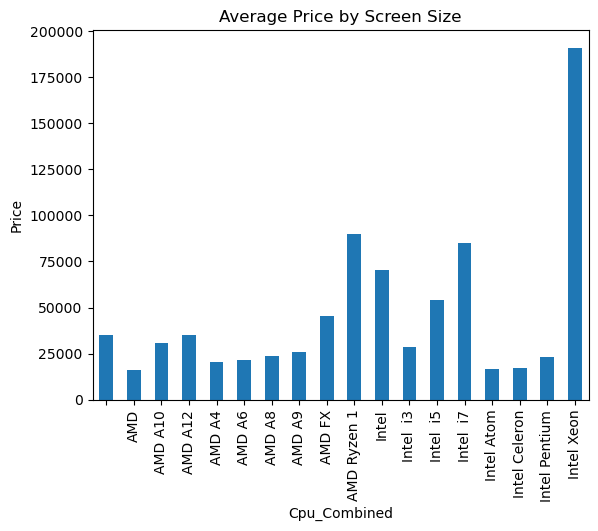

In [63]:
df.groupby('Cpu_Combined')['Price'].mean().plot(kind='bar')

plt.title('Average Price by Screen Size')
plt.xlabel('Cpu_Combined')
plt.ylabel('Price')
plt.show()

In [64]:
df = df.drop('Cpu', axis=1)

In [65]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,x_res,y_res,Cpu_Combined
0,Apple,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,2560,1600,Intel i5
1,Apple,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,1440,900,Intel i5
2,HP,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,1920,1080,Intel i5
3,Apple,Ultrabook,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,2880,1800,Intel i7
4,Apple,Ultrabook,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,2560,1600,Intel i5


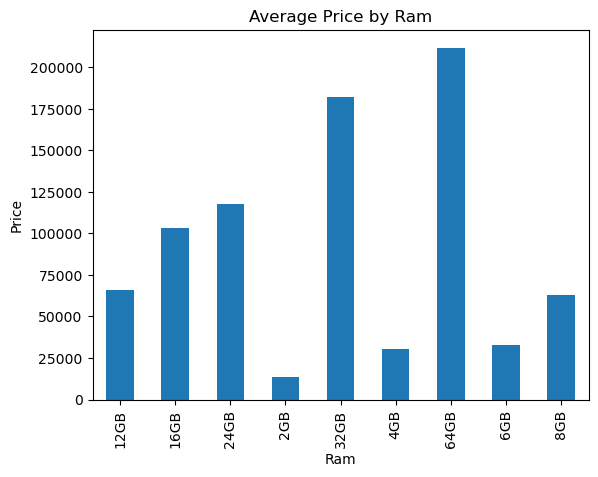

In [66]:
df.groupby('Ram')['Price'].mean().plot(kind='bar')

plt.title('Average Price by Ram')
plt.xlabel('Ram')
plt.ylabel('Price')
plt.show()

In [67]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

In [68]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [69]:
import re

# Solution 1: Most reliable method
df['SSD_GB'] = df['Memory'].apply(lambda x: 
    sum(int(match.group(1)) * (1024 if 'TB' in match.group(2) else 1)
    for match in [re.search(r'(\d+)\s*(GB|TB)\s*SSD', x, re.IGNORECASE)]
    if match
) if isinstance(x, str) else 0)

# Solution 2: Simpler alternative (GB only)
df['SSD_GB'] = df['Memory'].str.extract(r'(\d+)\s*GB.*SSD', flags=re.IGNORECASE).fillna(0).astype(int)

# Show results


In [70]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,x_res,y_res,Cpu_Combined,SSD_GB
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,2560,1600,Intel i5,128
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,1440,900,Intel i5,0
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,1920,1080,Intel i5,256
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,2880,1800,Intel i7,512
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,2560,1600,Intel i5,256


In [71]:
df = df.drop('Memory', axis=1)

In [72]:
df['Gpu'].value_counts().shape

(110,)

In [73]:
df['Gpu_Company'] = df['Gpu'].str.extract(
    r'(NVIDIA|AMD|Intel|Apple|Qualcomm|ARM|PowerVR)',
    flags=re.IGNORECASE
)[0]

# Standardize the names (optional)
df['Gpu_Company'] = df['Gpu_Company'].str.title().fillna('Integrated')

In [74]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,IPS,x_res,y_res,Cpu_Combined,SSD_GB,Gpu_Company
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,2560,1600,Intel i5,128,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,1440,900,Intel i5,0,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,1920,1080,Intel i5,256,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,2880,1800,Intel i7,512,Amd
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,2560,1600,Intel i5,256,Intel


In [75]:
df = df.drop('Gpu', axis=1)

In [76]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [77]:
main_os = ['Windows 10', 'No OS', 'Linux', 'Windows 7']

# Create the new column
df['OpSys_Simple'] = df['OpSys'].where(df['OpSys'].isin(main_os), 'Others')

In [78]:
df.sample(10)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,IPS,x_res,y_res,Cpu_Combined,SSD_GB,Gpu_Company,OpSys_Simple
176,Acer,Notebook,15.6,4,Windows 10,2.1kg,23922.7200,0,1366,768,Intel i3,128,Intel,Windows 10
305,Lenovo,Notebook,15.6,4,No OS,2.2kg,19180.2672,0,1366,768,Intel Pentium,0,Intel,No OS
626,Mediacom,Notebook,14.0,2,Windows 10,1.4kg,12733.9200,0,1920,1080,Intel Atom,0,Intel,Windows 10
128,Dell,Notebook,17.3,16,Windows 10,2.8kg,74378.8800,0,1920,1080,Intel i7,256,Amd,Windows 10
71,Dell,Ultrabook,13.3,8,Windows 10,1.4kg,50882.4000,1,1920,1080,Intel i7,256,Amd,Windows 10
663,HP,Notebook,15.6,6,Windows 10,2.04kg,28717.9200,0,1920,1080,Intel i3,0,Amd,Windows 10
823,MSI,Gaming,15.6,8,Windows 10,2.4kg,63882.7200,0,1920,1080,Intel i5,256,Nvidia,Windows 10
1199,MSI,Gaming,17.3,16,Windows 10,2.43kg,109165.3920,0,1920,1080,Intel i7,256,Nvidia,Windows 10
564,Asus,Notebook,15.6,8,Windows 10,2.5kg,44701.9200,0,1920,1080,Intel i5,128,Nvidia,Windows 10
454,Dell,Notebook,15.6,8,Windows 10,2.36kg,52161.1200,0,1920,1080,Intel i7,128,Amd,Windows 10


In [79]:
df = df.drop('OpSys', axis=1)

In [80]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [81]:
df.head()

,Company,TypeName,Inches,Ram,Weight,Price,IPS,x_res,y_res,Cpu_Combined,SSD_GB,Gpu_Company,OpSys_Simple
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,1,2560,1600,Intel i5,128,Intel,Others
1,Apple,Ultrabook,13.3,8,1.34,47895.5232,0,1440,900,Intel i5,0,Intel,Others
2,HP,Notebook,15.6,8,1.86,30636.0000,0,1920,1080,Intel i5,256,Intel,No OS
3,Apple,Ultrabook,15.4,16,1.83,135195.3360,1,2880,1800,Intel i7,512,Amd,Others
4,Apple,Ultrabook,13.3,8,1.37,96095.8080,1,2560,1600,Intel i5,256,Intel,Others


C:\Users\hp\AppData\Local\Temp\ipykernel_17104\842155811.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], kde=True, color='blue', bins=30)


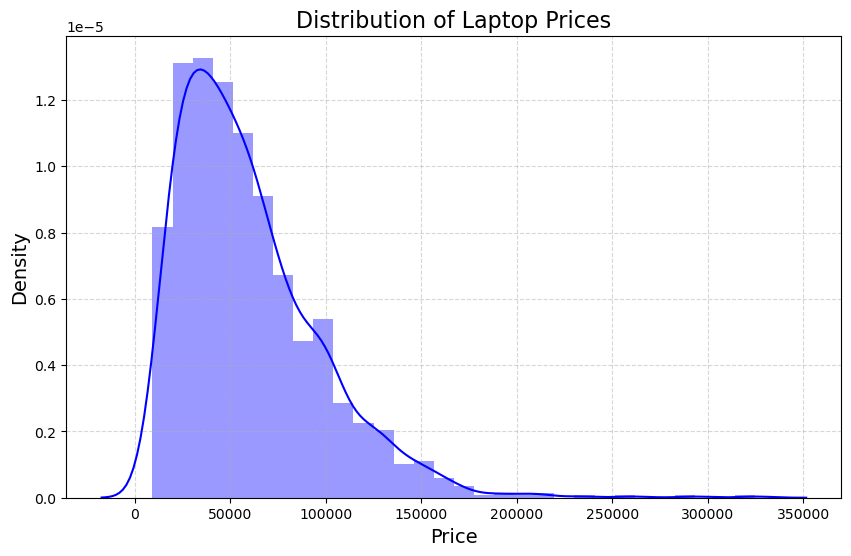

In [82]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Price'], kde=True, color='blue', bins=30)

# Customize the plot
plt.title('Distribution of Laptop Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [87]:
df.head()

,Company,TypeName,Inches,Ram,Weight,Price,IPS,x_res,y_res,Cpu_Combined,SSD_GB,Gpu_Company,OpSys_Simple
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,1,2560,1600,Intel i5,128,Intel,Others
1,Apple,Ultrabook,13.3,8,1.34,47895.5232,0,1440,900,Intel i5,0,Intel,Others
2,HP,Notebook,15.6,8,1.86,30636.0000,0,1920,1080,Intel i5,256,Intel,No OS
3,Apple,Ultrabook,15.4,16,1.83,135195.3360,1,2880,1800,Intel i7,512,Amd,Others
4,Apple,Ultrabook,13.3,8,1.37,96095.8080,1,2560,1600,Intel i5,256,Intel,Others


C:\Users\hp\AppData\Local\Temp\ipykernel_17104\1664280439.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'], kde=True, color='blue', bins=30)


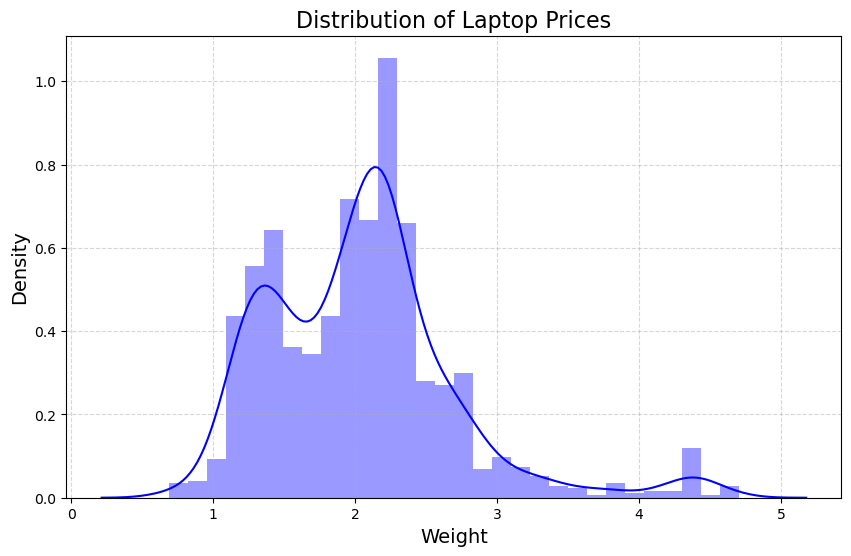

In [88]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Weight'], kde=True, color='blue', bins=30)

# Customize the plot
plt.title('Distribution of Laptop Prices', fontsize=16)
plt.xlabel('Weight', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_17104\2207964339.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'], kde=True, color='blue', bins=30)


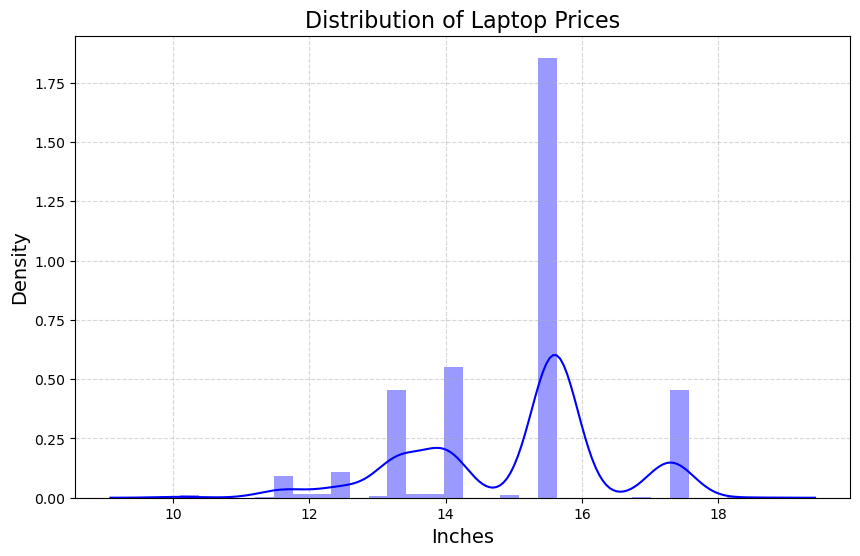

In [89]:

plt.figure(figsize=(10, 6))
sns.distplot(df['Inches'], kde=True, color='blue', bins=30)

# Customize the plot
plt.title('Distribution of Laptop Prices', fontsize=16)
plt.xlabel('Inches', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [90]:
corr_value = df['Inches'].corr(df['Weight'])
print(corr_value)


0.8276310951937216


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1303 non-null   object 
 1   TypeName      1303 non-null   object 
 2   Inches        1303 non-null   float64
 3   Ram           1303 non-null   int32  
 4   Weight        1303 non-null   float64
 5   Price         1303 non-null   float64
 6   IPS           1303 non-null   int32  
 7   x_res         1303 non-null   int32  
 8   y_res         1303 non-null   int32  
 9   Cpu_Combined  1303 non-null   object 
 10  SSD_GB        1303 non-null   int32  
 11  Gpu_Company   1303 non-null   object 
 12  OpSys_Simple  1303 non-null   object 
dtypes: float64(3), int32(5), object(5)
memory usage: 107.0+ KB


In [92]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'target' is the name of your target column
X = df.drop('Price', axis=1)  # Features
y = df['Price']               # Target variable

# Split data into training and testing sets
# test_size=0.2 means 20% data for testing, 80% for training
# random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use X_train, y_train for model training and X_test, y_test for evaluation


In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Updated categorical columns (all valid columns)
categorical_cols = ['Company', 'TypeName', 'Cpu_Combined', 'Gpu_Company', 'OpSys_Simple']

# Numeric columns - all except categorical + target column 'Price'
numeric_cols = [col for col in df.columns if col not in categorical_cols + ['Price']]

transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Scale numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical columns
    ]
)

full_pipeline = Pipeline(steps=[
    ('preprocessing', transformer)
])



# Example usage
# X = df.drop('target', axis=1)
# X_transformed = full_pipeline.fit_transform(X)


In [120]:
X_train_trans=full_pipeline.fit_transform(X_train)
X_test_transformed = full_pipeline.transform(X_test)

In [126]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Linear Regression model
lr_model = RandomForestRegressor(random_state=42)

# Train the model
lr_model.fit(X_train_trans, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test_transformed)

# Evaluate performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("random forest Mean Squared Error:", mse_lr)
print("random forest R2 Score:", r2_lr)

random forest Mean Squared Error: 267506661.81952932
random forest R2 Score: 0.8144737883628251


In [118]:
y_pred_lr

array([ 59571.73462574,  56318.83298197,  33221.10615197,  59112.8935263 ,
        55175.40792983,  68972.36258046,  36121.4520898 ,  21812.88517858,
        78011.95526065,  28942.81810941, 121605.24325972,  44401.62253874,
        78599.52746004,  35984.33929155,  91621.66679083,  70171.90511308,
        91819.33987666,  50836.60994571,  62484.94846173,  99987.56905213,
       112946.30350906,  32703.36685751,  72972.75091431,  16945.07829177,
        70222.07555807,  73495.1465938 ,  31861.60877758,  31549.45588459,
        67771.29758151,  55893.33027143,  33191.9052333 ,  81593.91548712,
        81516.94632753,  59098.41248971,  65107.41805328,  46709.60798247,
        40560.31244392,  32684.80128925,  72087.66650195,   2593.14520453,
        88474.46674254,  39338.11223081,  53685.19661654, 110769.60856238,
        29943.32536878,  55893.33027143,  96643.83347308,  13509.8905024 ,
        58806.75727266,  72871.07682917,  69133.77234898,  28635.39535729,
        36422.39423903,  